In [46]:
import os

In [47]:
import glob

In [48]:
from IPython.display import Image, display

In [49]:
from IPython.display import display

In [50]:
!nvidia-smi

Thu Dec 19 04:21:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [51]:
!pip install ultralytics

In [52]:
import ultralytics

In [53]:
ultralytics.checks()

Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.0/112.6 GB disk)


In [54]:
HOME = os.getcwd()

In [55]:
print(HOME)

/content


In [56]:
!mkdir {HOME}/datasets

mkdir: cannot create directory ‘/content/datasets’: File exists


In [ ]:


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KvrwWUrF1MGcGwSWdnna")
project = rf.workspace("ac1d").project("pothhole-detection-in-yolo")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...


RoboflowError: {
    "error": {
        "message": "Unsupported get request. Workspace with ID \"ac1d\" does not exist or cannot be loaded due to missing permissions.",
        "status": 404,
        "type": "GraphMethodException",
        "hint": "You can see your available workspaces by issuing a GET request to /workspaces"
    }
}

In [57]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8joVH7TL2k5V6uScFBEy")
project = rf.workspace("moinfaisal").project("potholes-detection-yolonas")
dataset = project.version(4).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


In [58]:
%cd {HOME}

/content


In [59]:
%cd {dataset.location}

/content/potholes-detection-yolonas-4


In [60]:


!yolo task=detect mode=train model=yolov8m.pt data=/content/potholes-detection-yolonas-4/data.yaml epochs=2 imgsz=640

Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/potholes-detection-yolonas-4/data.yaml, epochs=2, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

In [66]:
!ls {HOME}//potholes-detection-yolonas-4/runs/detect/train4

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1734582158.45a684000860.6794.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


/content


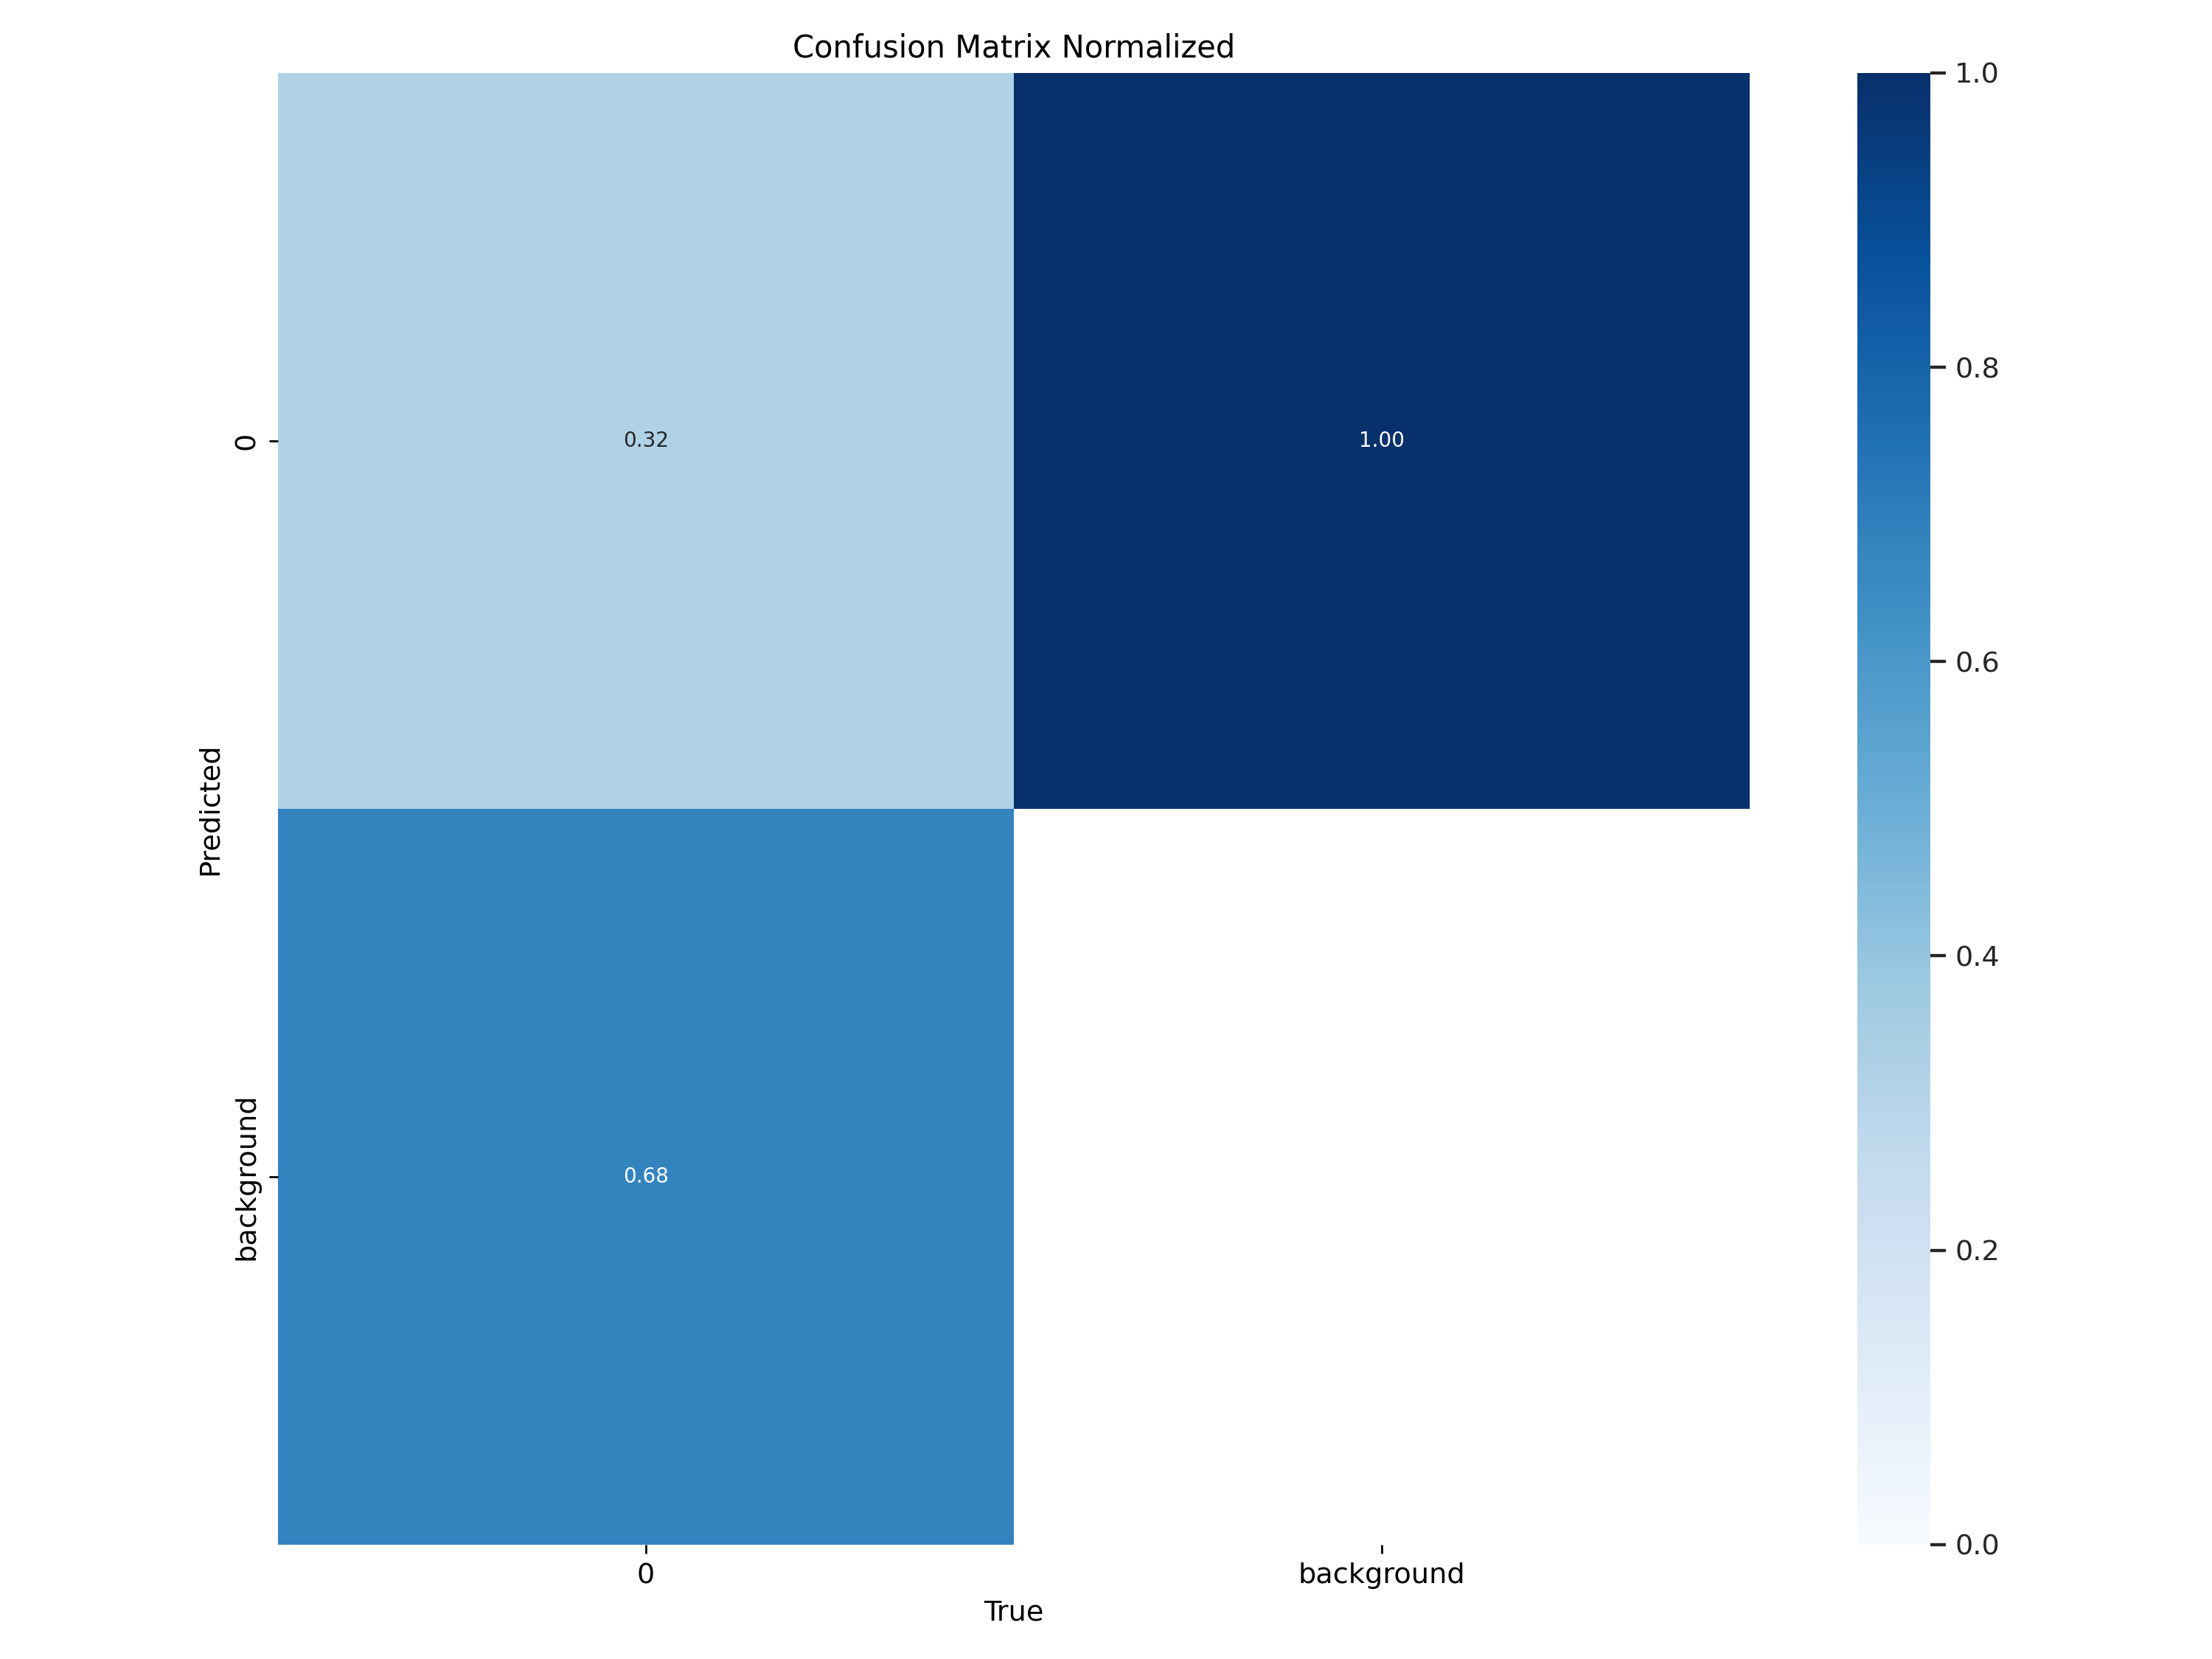

In [70]:
%cd {HOME}
Image(filename=f'{HOME}/potholes-detection-yolonas-4/runs/detect/train4/confusion_matrix_normalized.png', width=900)


/content


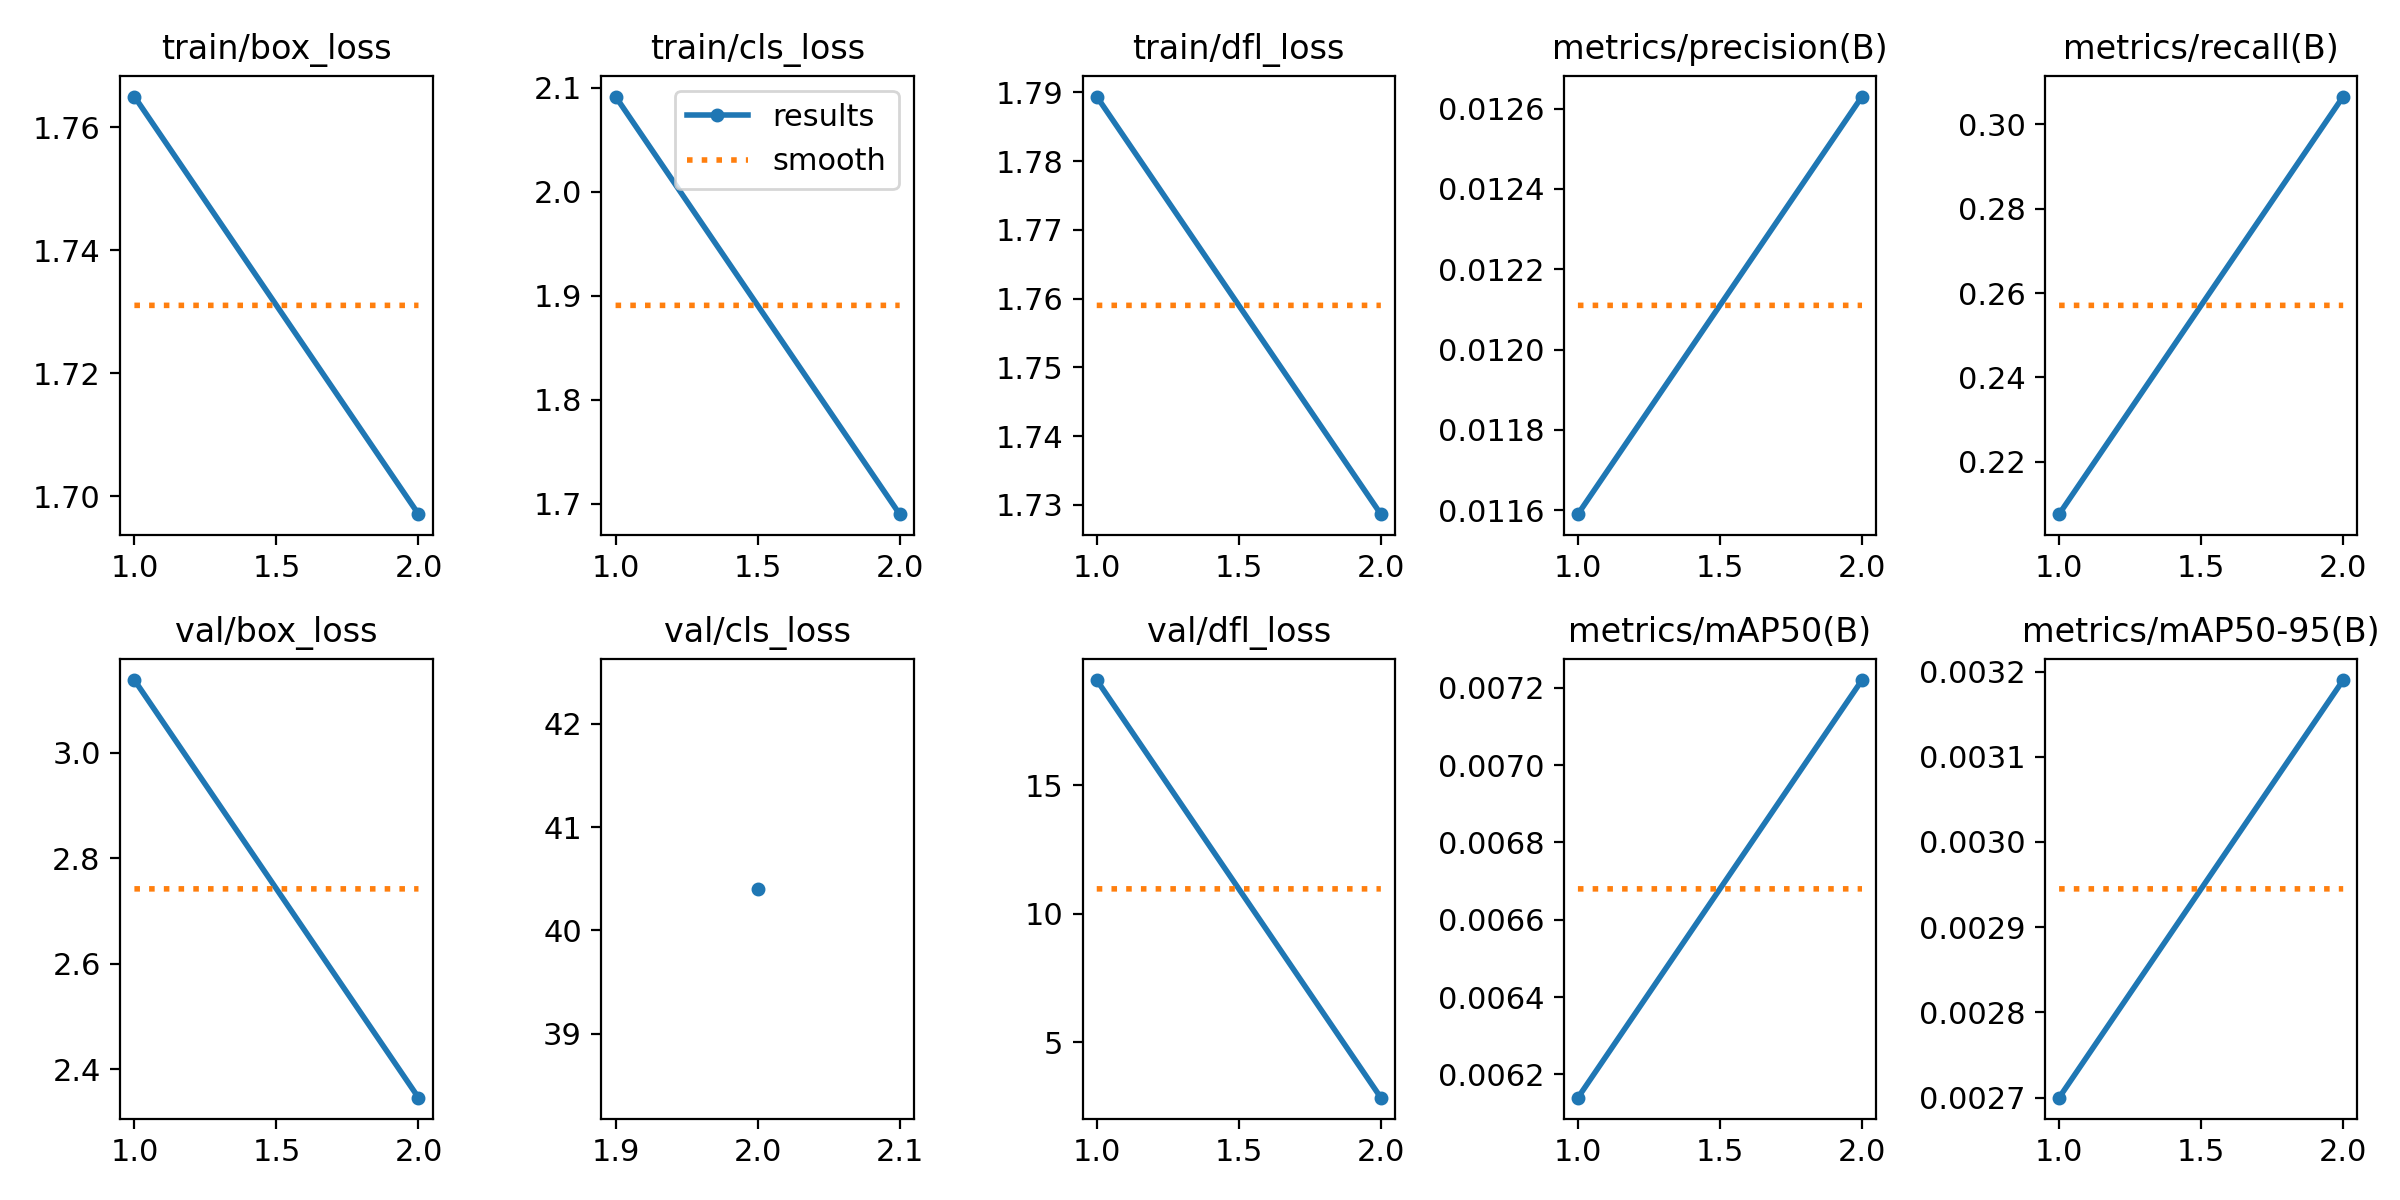

In [72]:
# Here is the graph of the training and validation loss
#box loss and class loss is important
# The behavior of the model is convincing the model is coverging, Training more will give better results
%cd {HOME}

Image(filename=f'{HOME}/potholes-detection-yolonas-4/runs/detect/train4/results.png', width=600)

/content


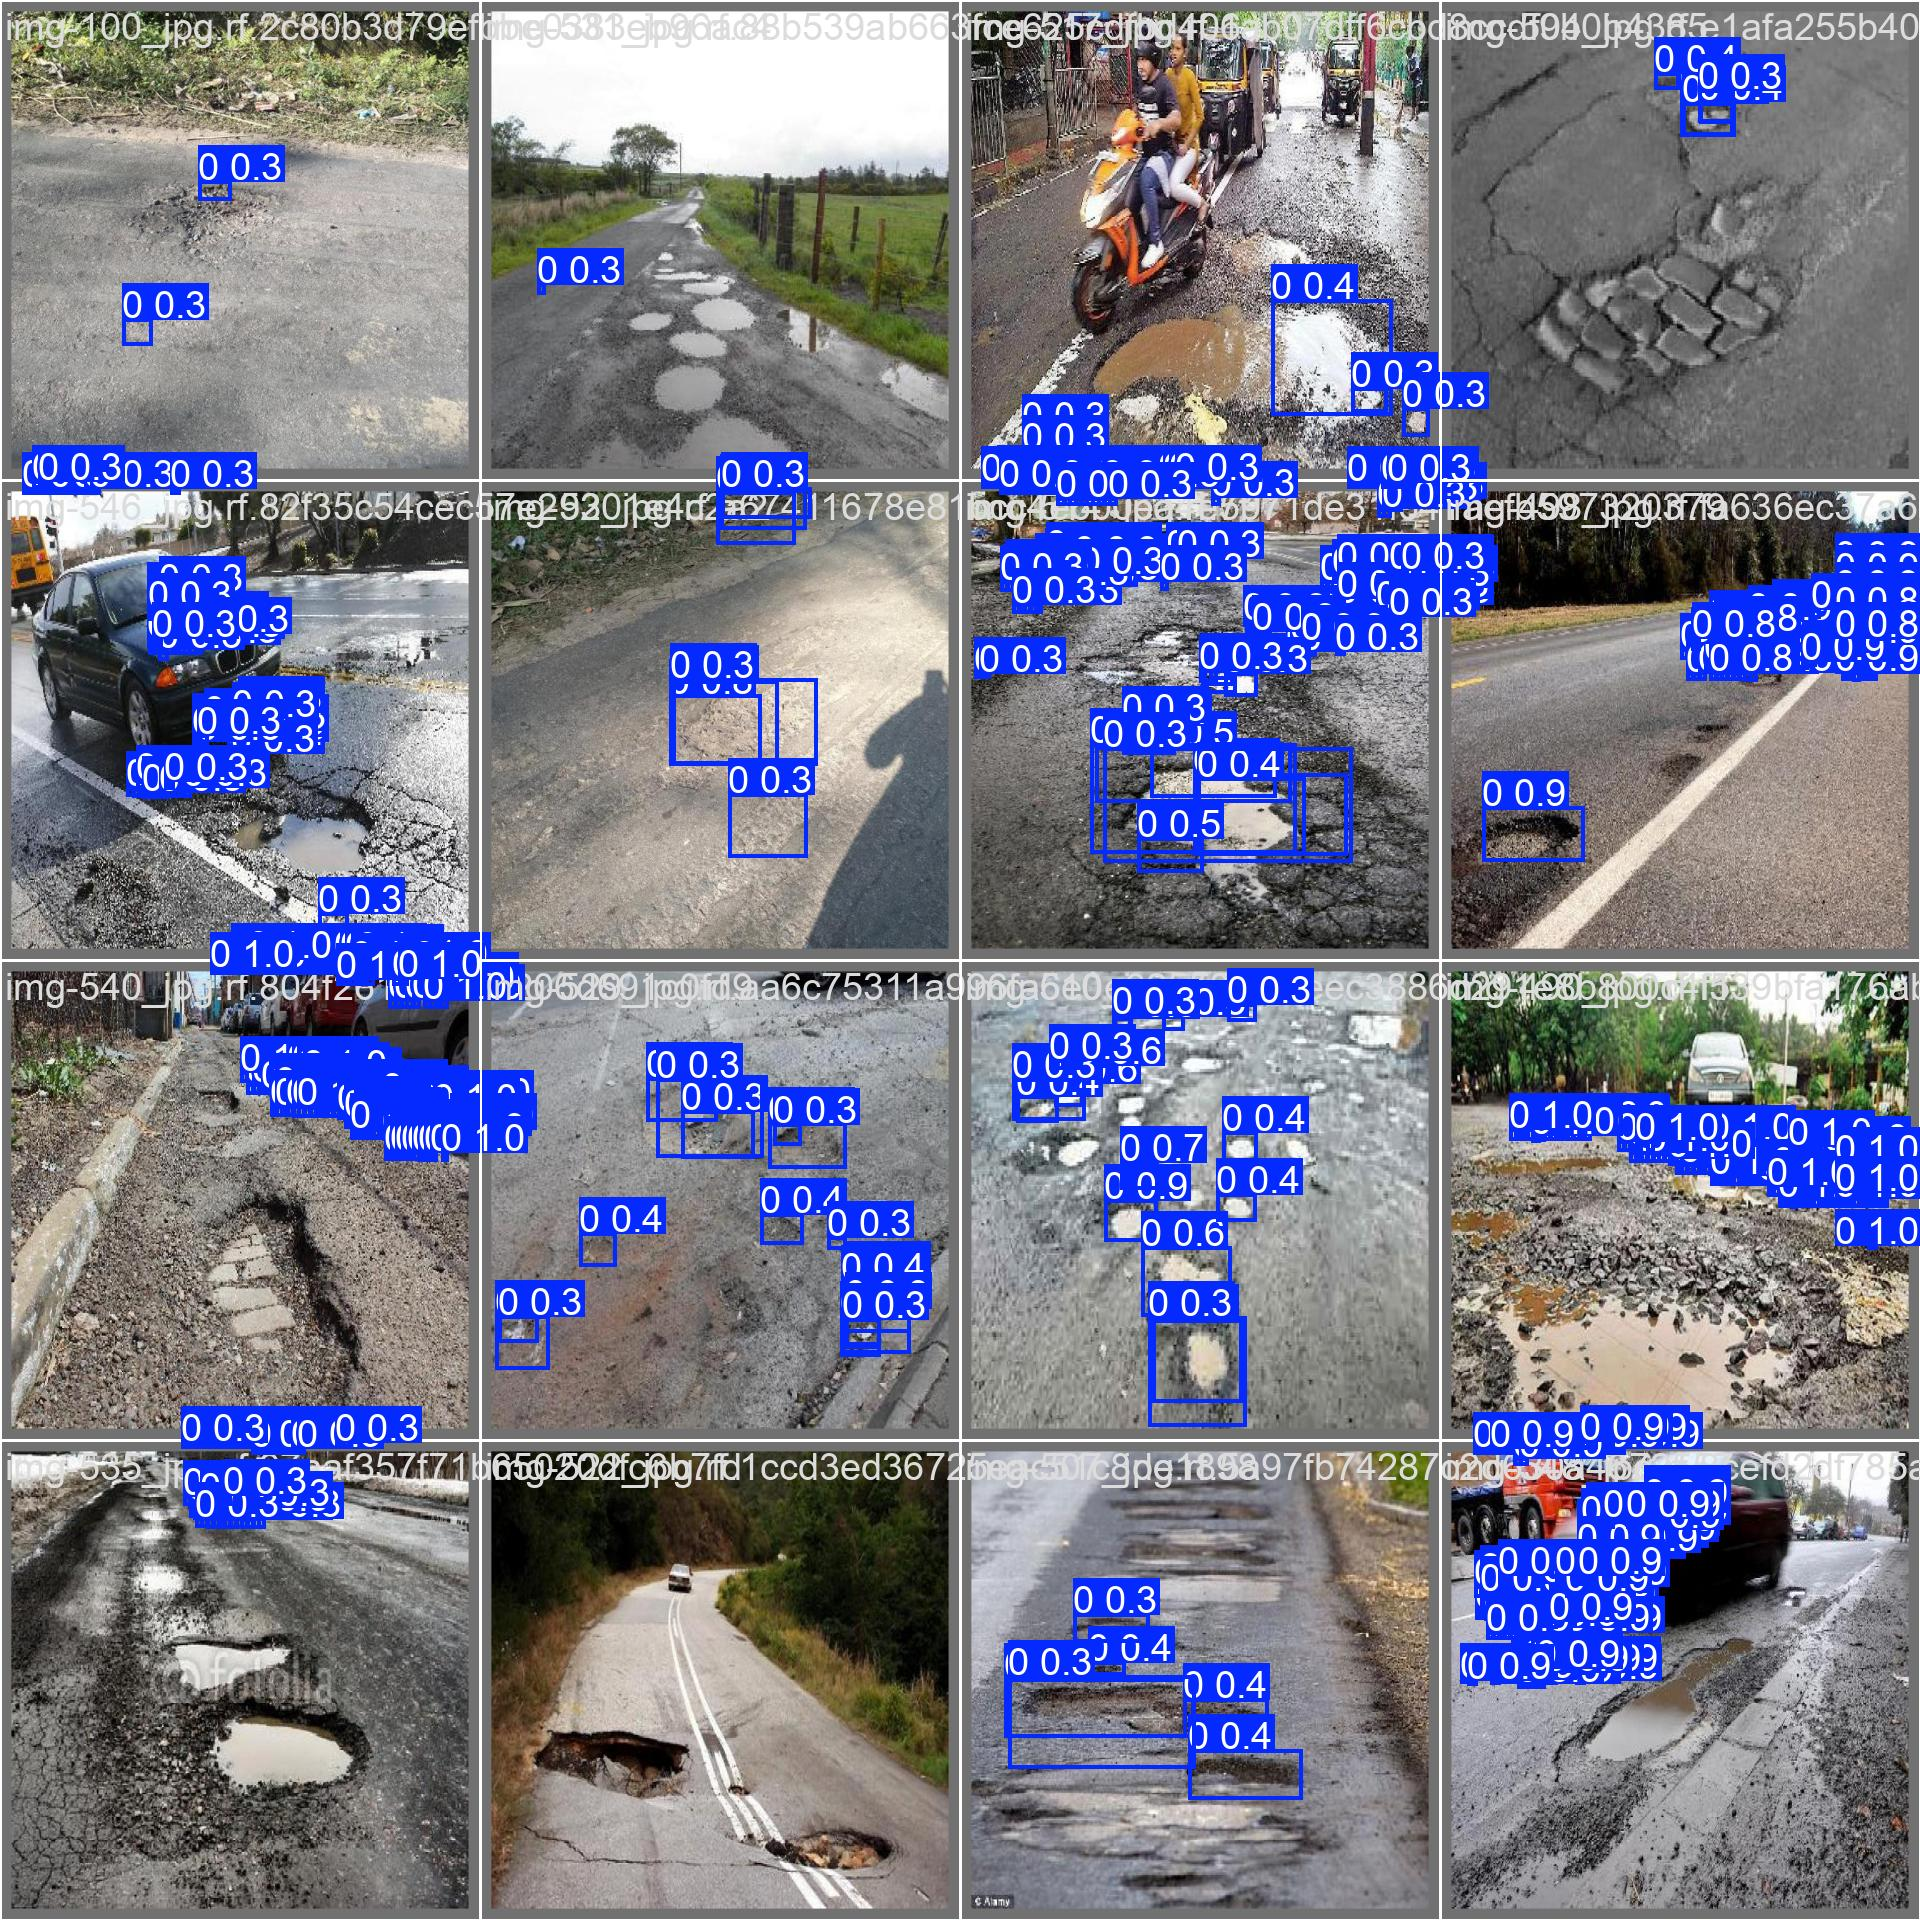

In [73]:
#Model Prediction on validation batch. These image are not used strictly for training so it is always better to take a
#look and see how model is behaving
%cd {HOME}
Image(filename=f'{HOME}/potholes-detection-yolonas-4/runs/detect/train4/val_batch0_pred.jpg', width=600)

In [77]:
#Here, we are taking the model best weights and using them to validate the model. Similarly as before we are using
#CLI to do that, The only difference is our mode = val instead of train
#Validation Script is using test dataset that was not used beforew

%cd {HOME}

!yolo task=detect mode=val model={HOME}/potholes-detection-yolonas-4/runs/detect/train4/weights/best.pt data=/content/potholes-detection-yolonas-4/data.yaml

/content
Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/potholes-detection-yolonas-4/valid/labels.cache... 135 images, 0 backgrounds, 0 corrupt: 100% 135/135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:07<00:00,  1.19it/s]
                   all        135        424     0.0127      0.333    0.00714    0.00321
Speed: 7.0ms preprocess, 19.9ms inference, 0.0ms loss, 10.2ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [78]:
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/potholes-detection-yolonas-4/runs/detect/train4/weights/best.pt conf=0.25 source=/content/potholes-detection-yolonas-4/test/images

/content
Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/67 /content/potholes-detection-yolonas-4/test/images/img-113_jpg.rf.d4934891f5e28585186e44dd843c3dc1.jpg: 640x640 24 0s, 37.0ms
image 2/67 /content/potholes-detection-yolonas-4/test/images/img-125_jpg.rf.cf2c1a87e3b6087aeb2d466f702a0d50.jpg: 640x640 28 0s, 37.0ms
image 3/67 /content/potholes-detection-yolonas-4/test/images/img-144_jpg.rf.5ee11c11323830f776a3346a2c94ea6d.jpg: 640x640 8 0s, 37.0ms
image 4/67 /content/potholes-detection-yolonas-4/test/images/img-159_jpg.rf.e78a402554d300cc41dc32a934916201.jpg: 640x640 6 0s, 37.0ms
image 5/67 /content/potholes-detection-yolonas-4/test/images/img-183_jpg.rf.6ea51cd5875e80b5be2c3719d0fe9eb0.jpg: 640x640 1 0, 29.3ms
image 6/67 /content/potholes-detection-yolonas-4/test/images/img-185_jpg.rf.48c9f6b54f05a2686a54b638384b02a3.jpg: 640x640 12 0s, 26.9ms
image 7/67 /c

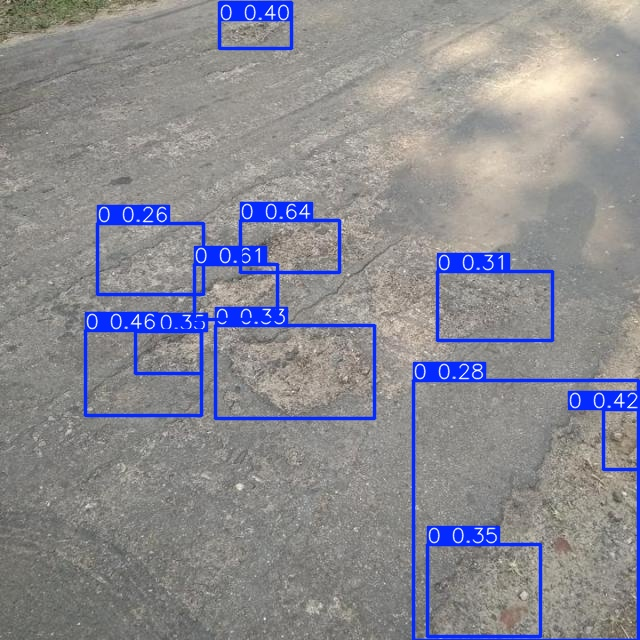

In [81]:
Image("/content/runs/detect/predict/img-77_jpg.rf.fb0330a23539c3e8471e2a905e20b787.jpg")
